In [ ]:
pip install factor_analyzer

     |████████████████████████████████| 41 kB 281 kB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41455 sha256=eb07d76a40041bc5cb22ea5d81e47a5e636e7077b906cdf361c12e27c2878ded
  Stored in directory: /root/.cache/pip/wheels/ac/00/37/1f0e8a5039f9e9f207c4405bbce0796f07701eb377bfc6cc76
Successfully built factor-analyzer


#Aim:To perform factor analysis i.e to reduce dimensions of given data based on shared variance
#Problem Statement:Consider a standard dataset and use statistical tool to perform Factor Analysis
#Dataset:-Product customer survey data for 100 customers

In [ ]:
# Import required libraries
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [ ]:
df= pd.read_csv("/content/Factor-Hair-Revised (1).csv")
df.columns

Index(['ID', 'ProdQual', 'Ecom', 'TechSup', 'CompRes', 'Advertising',
       'ProdLine', 'SalesFImage', 'ComPricing', 'WartyClaim', 'OrdBilling',
       'DelSpeed', 'Satisfaction'],
      dtype='object')

In [ ]:
df.head()

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
0,1,8.5,3.9,2.5,5.9,4.8,4.9,6.0,6.8,4.7,5.0,3.7,8.2
1,2,8.2,2.7,5.1,7.2,3.4,7.9,3.1,5.3,5.5,3.9,4.9,5.7
2,3,9.2,3.4,5.6,5.6,5.4,7.4,5.8,4.5,6.2,5.4,4.5,8.9
3,4,6.4,3.3,7.0,3.7,4.7,4.7,4.5,8.8,7.0,4.3,3.0,4.8
4,5,9.0,3.4,5.2,4.6,2.2,6.0,4.5,6.8,6.1,4.5,3.5,7.1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            100 non-null    int64  
 1   ProdQual      100 non-null    float64
 2   Ecom          100 non-null    float64
 3   TechSup       100 non-null    float64
 4   CompRes       100 non-null    float64
 5   Advertising   100 non-null    float64
 6   ProdLine      100 non-null    float64
 7   SalesFImage   100 non-null    float64
 8   ComPricing    100 non-null    float64
 9   WartyClaim    100 non-null    float64
 10  OrdBilling    100 non-null    float64
 11  DelSpeed      100 non-null    float64
 12  Satisfaction  100 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 10.3 KB


In [ ]:
# Using Bartlett’s test
#since the p-value is less than the critical value of 0.05
#reject the null hypothesis
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value


(790.0967390758257, 2.695612955320053e-118)

In [ ]:
#Kaiser-Meyer-Olkin (KMO) Test
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
print(kmo_all,kmo_model)

[0.64715758 0.49364901 0.58493089 0.5135809  0.83229473 0.81637714
 0.69408125 0.51642622 0.77078154 0.50711191 0.78043907 0.72081925
 0.65796766] 0.658818006764565


In [ ]:
kmo_model

0.658818006764565

In [ ]:
df.corr()

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
ID,1.000000,0.145774,-0.046173,0.031838,-0.144322,0.073129,-0.048641,0.013848,-0.063007,0.058592,-0.178352,-0.172134,0.061143
ProdQual,0.145774,1.000000,-0.137163,0.095600,0.106370,-0.053473,0.477493,-0.151813,-0.401282,0.088312,0.104303,0.027718,0.486325
Ecom,-0.046173,-0.137163,1.000000,0.000867,0.140179,0.429891,-0.052688,0.791544,0.229462,0.051898,0.156147,0.191636,0.282745
TechSup,0.031838,0.095600,0.000867,1.000000,0.096657,-0.062870,0.192625,0.016991,-0.270787,0.797168,0.080102,0.025441,0.112597
CompRes,-0.144322,0.106370,0.140179,0.096657,1.000000,0.196917,0.561417,0.229752,-0.127954,0.140408,0.756869,0.865092,0.603263
Advertising,0.073129,-0.053473,0.429891,-0.062870,0.196917,1.000000,-0.011551,0.542204,0.134217,0.010792,0.184236,0.275863,0.304669
ProdLine,-0.048641,0.477493,-0.052688,0.192625,0.561417,-0.011551,1.000000,-0.061316,-0.494948,0.273078,0.424408,0.601850,0.550546
SalesFImage,0.013848,-0.151813,0.791544,0.016991,0.229752,0.542204,-0.061316,1.000000,0.264597,0.107455,0.195127,0.271551,0.500205
ComPricing,-0.063007,-0.401282,0.229462,-0.270787,-0.127954,0.134217,-0.494948,0.264597,1.000000,-0.244986,-0.114567,-0.072872,-0.208296
WartyClaim,0.058592,0.088312,0.051898,0.797168,0.140408,0.010792,0.273078,0.107455,-0.244986,1.000000,0.197065,0.109395,0.177545


In [ ]:
df.count()

ID              100
ProdQual        100
Ecom            100
TechSup         100
CompRes         100
Advertising     100
ProdLine        100
SalesFImage     100
ComPricing      100
WartyClaim      100
OrdBilling      100
DelSpeed        100
Satisfaction    100
dtype: int64

In [ ]:
ev, v = fa.get_eigenvalues()
ev

array([4.04940851, 2.55663549, 1.72664228, 1.37065018, 0.83684981,
       0.63100326, 0.54725102, 0.4028055 , 0.31814687, 0.23545054,
       0.14324648, 0.09913308, 0.082777  ])

In [ ]:
fa = FactorAnalyzer(n_factors =4,rotation= 'varimax')#rotation
fa.fit(df)

FactorAnalyzer(n_factors=4, rotation='varimax', rotation_kwargs={})

In [ ]:
fa.get_factor_variance()

(array([3.41382651, 2.23368669, 1.68830695]),
 array([0.26260204, 0.17182205, 0.12986977]),
 array([0.26260204, 0.43442409, 0.56429386]))

In [ ]:
ev, v= fa.get_eigenvalues()

In [ ]:

fa = FactorAnalyzer()
fa.fit(df)

fa.loadings_


array([[-0.12633081,  0.01115193,  0.1342627 ],
       [ 0.29448254, -0.24529257,  0.13606369],
       [ 0.08322162,  0.78603561,  0.13622503],
       [-0.03925901,  0.1152093 ,  0.87284577],
       [ 0.88663428,  0.12022087, -0.09135756],
       [ 0.18296689,  0.53592312,  0.02195601],
       [ 0.73297674, -0.22921772,  0.14341034],
       [ 0.14763417,  1.01366736,  0.2119462 ],
       [-0.25594272,  0.3543333 , -0.26512841],
       [ 0.04157586,  0.19220639,  0.88485762],
       [ 0.75378285,  0.1339406 , -0.04402584],
       [ 0.90097502,  0.17294165, -0.15185958],
       [ 0.69711089,  0.28941393,  0.14366632]])

In [ ]:
df.describe()

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.00000,100.000000,100.000000
mean,50.500000,7.810000,3.672000,5.365000,5.442000,4.010000,5.805000,5.12300,6.974000,6.043000,4.27800,3.886000,6.918000
std,29.011492,1.396279,0.700516,1.530457,1.208403,1.126943,1.315285,1.07232,1.545055,0.819738,0.92884,0.734437,1.191839
min,1.000000,5.000000,2.200000,1.300000,2.600000,1.900000,2.300000,2.90000,3.700000,4.100000,2.00000,1.600000,4.700000
25%,25.750000,6.575000,3.275000,4.250000,4.600000,3.175000,4.700000,4.50000,5.875000,5.400000,3.70000,3.400000,6.000000
50%,50.500000,8.000000,3.600000,5.400000,5.450000,4.000000,5.750000,4.90000,7.100000,6.100000,4.40000,3.900000,7.050000
75%,75.250000,9.100000,3.925000,6.625000,6.325000,4.800000,6.800000,5.80000,8.400000,6.600000,4.80000,4.425000,7.625000
max,100.000000,10.000000,5.700000,8.500000,7.800000,6.500000,8.400000,8.20000,9.900000,8.100000,6.70000,5.500000,9.900000


In [ ]:
df.shape[1]+1

14

In [ ]:
ev1,v1 =fa.get_eigenvalues()

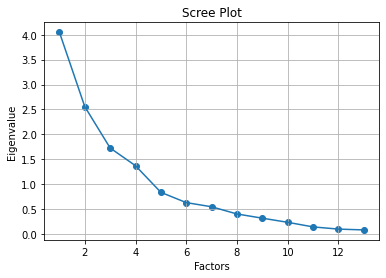

In [ ]:
# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

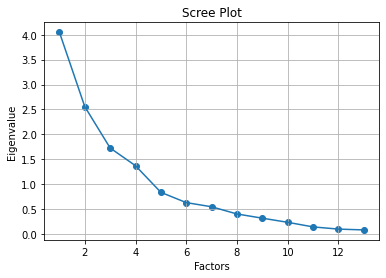

In [ ]:
# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),ev1)
plt.plot(range(1,df.shape[1]+1),ev1)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
fa.get_factor_variance()

(array([2.89470866, 2.27245218, 1.72492051, 1.68236419]),
 array([0.2226699 , 0.17480401, 0.13268619, 0.12941263]),
 array([0.2226699 , 0.39747391, 0.5301601 , 0.65957273]))

In [ ]:
fa.get_communalities()#Amount of variance a variable shared with other variable

array([0.03411031, 0.16540173, 0.64333508, 0.77667419, 0.8089196 ,
       0.32117254, 0.61036219, 1.09423856, 0.26135184, 0.82164486,
       0.58806695, 0.86472613, 0.59036402])

In [ ]:
fa.get_uniquenesses()

array([ 0.96588969,  0.83459827,  0.35666492,  0.22332581,  0.1910804 ,
        0.67882746,  0.38963781, -0.09423856,  0.73864816,  0.17835514,
        0.41193305,  0.13527387,  0.40963598])

#Conclusion:We have analyse the dataset weather it is appropriate for factor analysis or not. We have reduced the dimensions by creating factors.

#Dataset link:https://www.kaggle.com/ipravin/hair-customer-survey-data-for-100-customers
#Name:Sakshi Deo
